# Naive Bayes Algorithm 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('weight-height.csv')

In [5]:
df

,Cinsiyet,Kilo,Boy
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


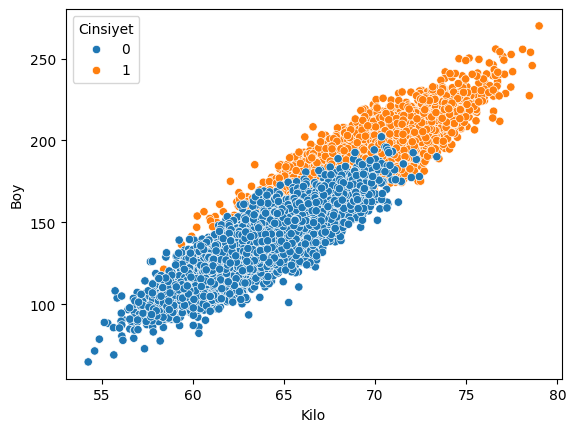

In [6]:
fig = sns.scatterplot(data = df, x = 'Kilo', y = 'Boy', hue = 'Cinsiyet' )

In [7]:
def splitting(mydata, ratio):
    train_size = int(len(mydata) * ratio)
    train_index=np.random.choice(range(0,len(mydata)),replace=False,size=train_size)
    train=mydata.iloc[train_index]
    test=mydata[~mydata.index.isin(train_index)]
    return train,test

In [8]:
train,test=splitting(mydata=df, ratio=0.8)

In [9]:
train

,Cinsiyet,Kilo,Boy
362,1,64.955078,156.544786
4171,1,71.484075,193.009758
5712,0,64.542250,162.413463
633,1,73.404059,192.732405
9202,0,65.488671,135.013164
...,...,...,...
9786,0,63.583680,128.219617
7235,0,61.745701,132.595680
5196,0,61.743055,111.964093
8807,0,60.911090,104.276529


In [10]:
test

,Cinsiyet,Kilo,Boy
0,1,73.847017,241.893563
7,1,68.348516,167.971111
16,1,72.418317,196.028506
17,1,63.974326,172.883470
18,1,69.640060,185.983958
...,...,...,...
9974,0,65.393947,143.017835
9977,0,64.494838,149.402547
9992,0,62.077832,138.691680
9997,0,63.867992,128.475319


In [11]:
y_train=train['Cinsiyet']
x_train=train.drop('Cinsiyet',axis=1)

In [12]:
y_train

362     1
4171    1
5712    0
633     1
9202    0
       ..
9786    0
7235    0
5196    0
8807    0
7102    0
Name: Cinsiyet, Length: 8000, dtype: int64

In [13]:
x_train

,Kilo,Boy
362,64.955078,156.544786
4171,71.484075,193.009758
5712,64.542250,162.413463
633,73.404059,192.732405
9202,65.488671,135.013164
...,...,...
9786,63.583680,128.219617
7235,61.745701,132.595680
5196,61.743055,111.964093
8807,60.911090,104.276529


In [14]:
# P(y)
def Py(y):
    p_y=[]
    for i in np.sort(y.unique()):
        pyi=len(y[y==i])/len(y)
        p_y.append(pyi)
    return p_y

In [15]:
class_probs=Py(y_train)
class_probs

[0.499, 0.501]

In [16]:
def calculate_mean_std(x,y):
    means=[]
    std=[]
    for i in np.sort(y.unique()):
        means_i=x[y==i].mean()
        sd_i=x[y==i].std()
        means.append(means_i)
        std.append(sd_i)
    return means,std 

In [17]:
means,std=calculate_mean_std(x_train,y_train)
means

[Kilo     63.733748
 Boy     136.081100
 dtype: float64,
 Kilo     69.017714
 Boy     186.915907
 dtype: float64]

In [18]:
std

[Kilo     2.675817
 Boy     18.876996
 dtype: float64,
 Kilo     2.860198
 Boy     19.815926
 dtype: float64]

In [19]:
# Gauss Olasılık Yoğunluk Fonksiyonu P(x|y)'yi hesaplayın
def calculateGaussianProbability(x, mean, stdev):
    expo = np.exp(-(np.power(x - mean, 2) / (2 * np.power(stdev, 2))))
    return (1 / (np.sqrt(2 * np.pi) * stdev)) * expo

In [20]:
x_test=test.drop('Cinsiyet',axis=1)
x_test

,Kilo,Boy
0,73.847017,241.893563
7,68.348516,167.971111
16,72.418317,196.028506
17,63.974326,172.883470
18,69.640060,185.983958
...,...,...
9974,65.393947,143.017835
9977,64.494838,149.402547
9992,62.077832,138.691680
9997,63.867992,128.475319


In [22]:
# Calculate Class Probabilities P(y|x)
def calculateClassProbabilities(x,means,sds,class_probs):
    probabilities = []
    for i in range(len(class_probs)):
        numerator=1
        for j in range(len(x.columns)):
            mean_ij=means[i][j]
            sd_ij=sds[i][j]
            fxji=calculateGaussianProbability(x=x.iloc[:,j], mean=mean_ij, stdev=sd_ij)
            numerator=numerator*fxji
        numerator=numerator*class_probs[i]
        probabilities.append(numerator)
    return (probabilities/np.sum(probabilities,axis=0))

In [23]:
calculateClassProbabilities(x_test,means,std,class_probs)

C:\Users\ozged\AppData\Local\Temp\ipykernel_40832\3609023197.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_ij=means[i][j]
C:\Users\ozged\AppData\Local\Temp\ipykernel_40832\3609023197.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sd_ij=sds[i][j]


array([[2.59500877e-08, 8.95967167e-02, 8.39109929e-05, ...,
        9.97026330e-01, 9.97523475e-01, 9.99885498e-01],
       [9.99999974e-01, 9.10403283e-01, 9.99916089e-01, ...,
        2.97367004e-03, 2.47652490e-03, 1.14502185e-04]])

In [24]:
def predict(x):
    probabilities=calculateClassProbabilities(x,means,std,class_probs)
    Class=(probabilities[1]>=0.5).astype('int')
    return(Class)

In [25]:
prediction=predict(x_test)

C:\Users\ozged\AppData\Local\Temp\ipykernel_40832\3609023197.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_ij=means[i][j]
C:\Users\ozged\AppData\Local\Temp\ipykernel_40832\3609023197.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sd_ij=sds[i][j]


In [26]:
y_test = test["Cinsiyet"]

In [27]:
list(zip(prediction,y_test))

[(1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 

In [28]:
def compute_accuracy(prediction,test_y):
    return np.mean(prediction==test_y)

In [29]:
compute_accuracy(prediction,test.Cinsiyet)

0.885

# Not So Naive Bayes

In [30]:
def compute_std_correlation_for_each_column(x):
    return (x.std(),x.corr().iloc[0,1])

In [31]:
def calculateGaussianProbability(x,k,means,sds,corr):
    expo = np.exp(-((sds[1]**2)*(x.iloc[:,0]-means[k][0])**2
                    +(sds[0]**2)*(x.iloc[:,1]-means[k][1])**2
                    -2*corr*sds[0]*sds[1]*(x.iloc[:,0]-means[k][0])*(x.iloc[:,1]-means[k][1])) 
                  / (2*(1-corr**2)*(sds[0]**2)*(sds[1])**2))
    return (1 / (2*np.pi*sds[0]*sds[1]*np.sqrt(1-corr**2))) * expo

In [32]:
def compute_accuracy_for_NSNB(prediction,test_y):
    return (1-np.sum(np.abs(prediction-test_y))/len(prediction))*100

In [33]:
def compute_means_for_each_class(x,y):
    means=[]
    for i in np.sort(y.unique()):
        means_i=x[y==i].mean()
        means.append(means_i)
    return means

In [34]:
def not_so_naive_bayes(x_train,x_test,y_train,y_test):
    class_probs=Py(y_train)
    means=compute_means_for_each_class(x_train,y_train)
    stdevs,correlation=compute_std_correlation_for_each_column(x_train)
    
    probabilities=[]
    for i in range(len(class_probs)):
        fi=calculateGaussianProbability(x=x_test,k=i,means=means,sds=stdevs,corr=correlation)
        numerator=fi*class_probs[i]
        probabilities.append(numerator)
    probabilities=probabilities/np.sum(probabilities,axis=0)
    prediction=(probabilities[1]>=0.5).astype('int')
    accuracy=compute_accuracy(prediction,y_test)
    return accuracy,prediction

In [35]:
accuracy,prediction = not_so_naive_bayes(x_train,x_test,y_train,y_test)
accuracy

C:\Users\ozged\AppData\Local\Temp\ipykernel_40832\1066852313.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expo = np.exp(-((sds[1]**2)*(x.iloc[:,0]-means[k][0])**2
C:\Users\ozged\AppData\Local\Temp\ipykernel_40832\1066852313.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  +(sds[0]**2)*(x.iloc[:,1]-means[k][1])**2
C:\Users\ozged\AppData\Local\Temp\ipykernel_40832\1066852313.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


0.918